#### This notebook is used for experimenting with library functions. Confirming and visualizing datasets

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
berk_boundary = gpd.read_file("./../../data/raw/Land_Boundary_20251109.geojson")

alameda_tracts = gpd.read_file("./../../data/clean/alameda_tracts.geojson")


In [36]:
alameda_tracts.shape

(379, 2)

In [37]:
pts = alameda_tracts.representative_point()

In [217]:
berkeley_tracts = gpd.read_file("./../../data/clean/berkeley_tracts.geojson")
berkeley_tracts["tract"].unique()

array(['982100', '422902', '422901', '421100', '421400', '421700',
       '421800', '421900', '423700', '423800', '423901', '424001',
       '422500', '422700', '423000', '423100', '424002', '423300',
       '423400', '423500', '423602', '422000', '421200', '422800',
       '421300', '423200', '423902', '421500', '421600', '423601',
       '422100', '422200', '422300', '422400'], dtype=object)

In [56]:
ac_stops = gpd.read_file("./../../data/clean/ac_stops.geojson")

In [59]:
ac_stops.columns

Index(['stop_id', 'routes', 'geometry'], dtype='object')

In [60]:
berkeley_tracts.columns

Index(['tract', 'geometry'], dtype='object')

In [107]:
berkeley_stops = gpd.read_file("../../data/clean/berkeley_boundary.geojson")

<Axes: >

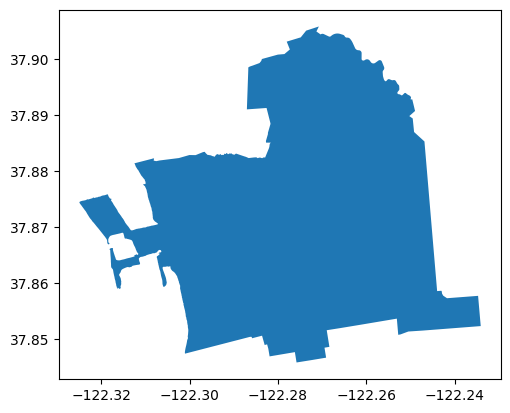

In [108]:
berkeley_stops.plot()

In [100]:
berkeley_stops.convert_dtypes().dtypes

stop_id     string[python]
routes      string[python]
tract       string[python]
geometry          geometry
dtype: object

<Axes: >

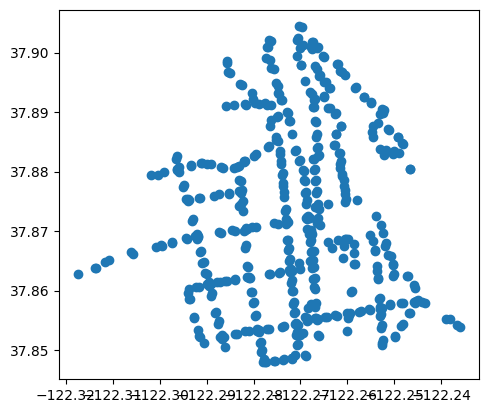

In [101]:
berkeley_stops.plot()

In [109]:
berk_stops = gpd.read_file("./../../data/clean/berkeley_stops.geojson")

In [113]:
berk_stops.convert_dtypes().dtypes

stop_id     string[python]
routes      string[python]
tract       string[python]
geometry          geometry
dtype: object

In [181]:
hourly_arrivals = pd.read_csv("./../../data/clean/hourly_arrivals.csv")
hourly_arrivals = hourly_arrivals.convert_dtypes()

In [182]:
print(f"\n{hourly_arrivals.head()}")
print(f"\n{hourly_arrivals.dtypes}")


             time_block  arrivals
0      AM Peak (7–9:59)      3467
1     Early AM (5–6:59)      1922
2    Evening (19–21:59)      2845
3  Late Night (22–0:59)      2092
4     Midday (10–14:59)      5297

time_block    string[python]
arrivals               Int64
dtype: object


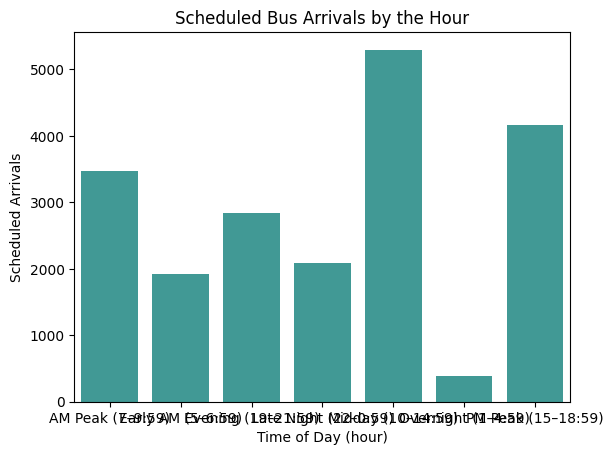

In [183]:
# Plot distibution
sns.barplot(
    data=hourly_arrivals, 
    x="time_block", 
    y="arrivals",
    order=time_order
    color="#32a8a2"
)

plt.title("Scheduled Bus Arrivals by the Hour")
plt.xlabel("Time of Day (hour)")
plt.ylabel("Scheduled Arrivals")

plt.show()

In [146]:
tract_time_block_arrivals = pd.read_csv("./../../data/clean/tract_time_block_arrivals.csv")

In [151]:
tract_time_block_arrivals.convert_dtypes().dtypes

tract                  Int64
time_block    string[python]
arrivals               Int64
dtype: object

In [153]:
blocks = gpd.read_file("./../../data/clean/block_pop_coverage.geojson")
blocks

,tract,population,geometry
0,421900,0,"POLYGON ((-122.29591 37.88048, -122.2958 37.88..."
1,423200,0,"POLYGON ((-122.2924 37.86243, -122.29212 37.86..."
2,422000,12,"POLYGON ((-122.29731 37.85955, -122.2971 37.85..."
3,423200,63,"POLYGON ((-122.29553 37.86839, -122.29532 37.8..."
4,421900,84,"POLYGON ((-122.29204 37.88312, -122.29199 37.8..."
...,...,...,...
1519,422000,100,"POLYGON ((-122.30314 37.86689, -122.30299 37.8..."
1520,422000,21,"POLYGON ((-122.33264 37.86267, -122.33137 37.8..."
1521,422400,111,"POLYGON ((-122.2684 37.8731, -122.26834 37.873..."
1522,421200,67,"POLYGON ((-122.27279 37.89245, -122.27276 37.8..."


In [158]:
block_cov = gpd.read_file("./../../data/clean/block_pop_covered.geojson")
block_cov

,tract,population,population_covered,geometry
0,424002,81,81,"POLYGON ((-122.27925 37.84767, -122.2782 37.84..."
1,424001,69,69,"POLYGON ((-122.27771 37.84795, -122.27769 37.8..."
2,424002,42,42,"POLYGON ((-122.27787 37.84793, -122.27785 37.8..."
3,424001,0,0,"POLYGON ((-122.27759 37.84797, -122.27586 37.8..."
4,424002,170,170,"POLYGON ((-122.27945 37.84864, -122.27842 37.8..."
...,...,...,...,...
1519,421200,50,50,"POLYGON ((-122.27199 37.90296, -122.27184 37.9..."
1520,421200,40,40,"POLYGON ((-122.2728 37.90314, -122.27277 37.90..."
1521,421200,28,28,"POLYGON ((-122.27216 37.90403, -122.27194 37.9..."
1522,421100,63,63,"POLYGON ((-122.27052 37.90379, -122.27052 37.9..."


In [162]:
block_cov.convert_dtypes().dtypes

tract                 string[python]
population                     Int32
population_covered             Int32
geometry                    geometry
dtype: object

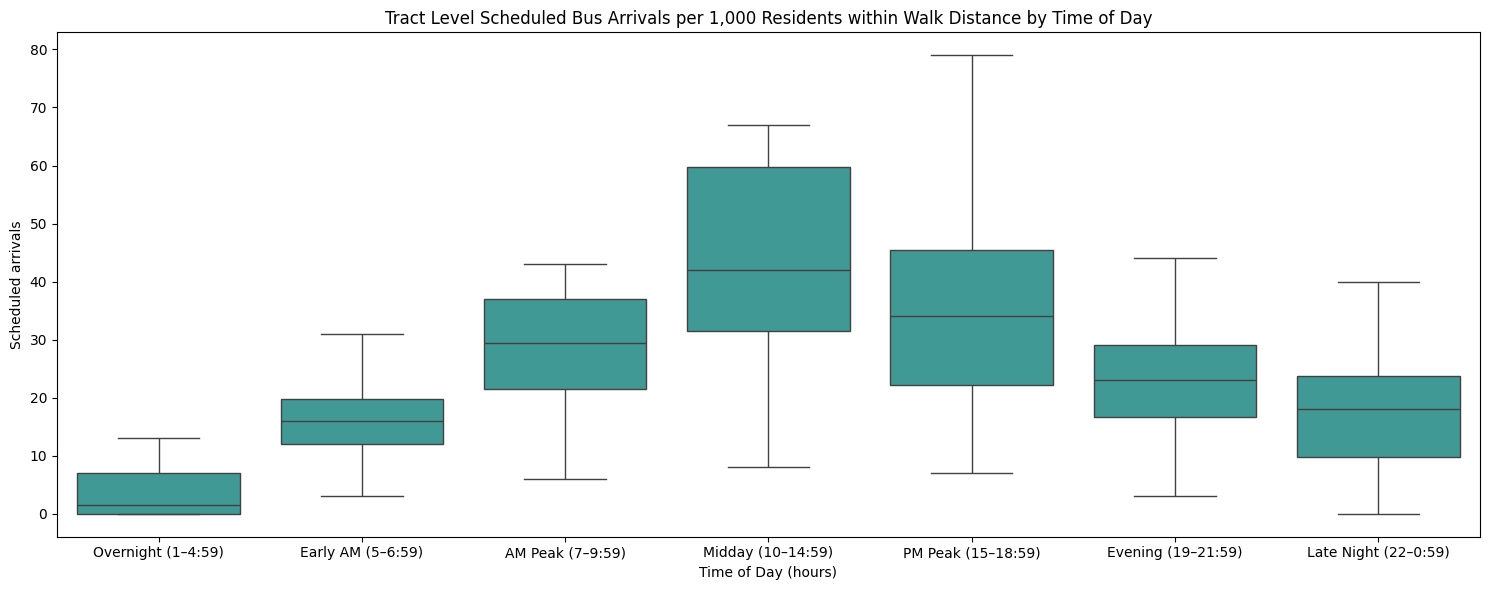

In [184]:
tract_time_block_arrivals = gpd.read_file("./../../data/clean/tract_time_block_arrivals_normalized.geojson")

plt.figure(figsize=(15, 6))

time_order = [
    "Overnight (1–4:59)",
    "Early AM (5–6:59)",
    "AM Peak (7–9:59)",
    "Midday (10–14:59)",
    "PM Peak (15–18:59)",
    "Evening (19–21:59)",
    "Late Night (22–0:59)",
]

sns.boxplot(
    data=tract_time_block_arrivals,
    x="time_block",
    y="arrivals_per_1000_covered",
    order=time_order,
    showfliers=False,
    color="#32a8a2"
)

plt.xlabel("Time of Day (hours)")
plt.ylabel("Scheduled arrivals")
plt.title("Tract Level Scheduled Bus Arrivals per 1,000 Residents within Walk Distance by Time of Day")
plt.tight_layout()

plt.show()

In [167]:
berkeley_stops = gpd.read_file("./../../data/clean/berkeley_stops.geojson")
berkeley_stops

,stop_id,routes,tract,geometry
0,55909,36,422000,POINT (-122.29161 37.85229)
1,55915,36,422000,POINT (-122.29138 37.85218)
2,55970,36,422000,POINT (-122.29261 37.85541)
3,50633,36,422000,POINT (-122.29257 37.85557)
4,58667,36,422000,POINT (-122.29177 37.85333)
...,...,...,...,...
498,53517,6 851,982100,POINT (-122.2658 37.87109)
499,53519,52 F,982100,POINT (-122.25399 37.87261)
500,53524,6,422800,POINT (-122.26088 37.86548)
501,53542,6,423602,POINT (-122.25845 37.86446)


In [172]:
tract_population_covered = pd.read_csv("./../../data/clean/hourly_arrivals.csv")
print(tract_population_covered["population"].sum())
print(tract_population_covered["population_"].sum())

124321


KeyError: 'population_'

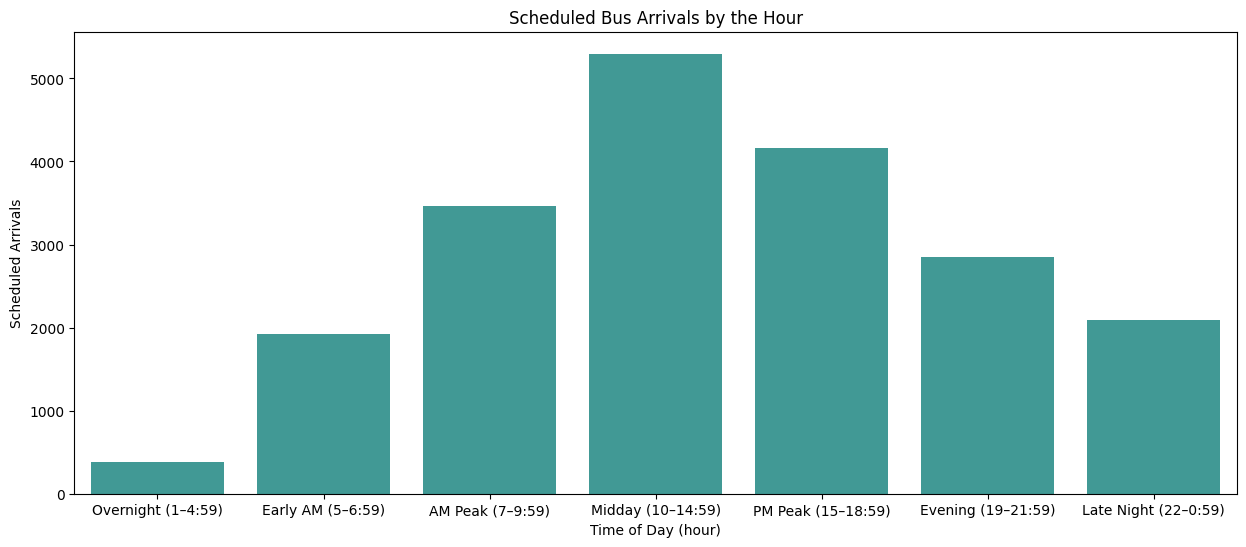

In [186]:
plt.figure(figsize=(15, 6))
# Plot distibution
sns.barplot(
    data=hourly_arrivals, 
    x="time_block", 
    y="arrivals",
    order=time_order,
    color="#32a8a2"
)

plt.title("Scheduled Bus Arrivals by the Hour")
plt.xlabel("Time of Day (hour)")
plt.ylabel("Scheduled Arrivals")

plt.show()

In [187]:
tract_population_covered = pd.read_csv("./../../data/clean/tract_population_covered.csv")
tract_population_covered

,tract,population,population_covered
0,421100,2031,1988.601129
1,421200,3657,3543.618814
2,421300,3945,3704.914160
3,421400,1679,1679.000000
4,421500,3745,3685.345313
5,421600,3836,3735.544239
6,421700,3386,3386.000000
7,421800,2110,2110.000000
8,421900,3901,3672.842784
9,422000,4160,2669.673342


In [3]:
tract_time_block_arrivals = gpd.read_file("./../../data/clean/tract_time_block_arrivals.geojson")
tract_time_block_arrivals = tract_time_block_arrivals[tract_time_block_arrivals["time_block"] == 'Midday (10–14:59)']
tract_time_block_arrivals.explore()
